Build a regression model.

You will see bunch of code block for data exploration. Model is close to the end.

In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

r = pd.read_csv('bikedata.csv')
s = pd.read_csv('venues.csv')

r.head()


,Unnamed: 0,latitude,longitude,extra.normal_bikes
0,0,55.744901,37.602018,5
1,1,55.633750,37.520553,2
2,2,55.781240,37.592390,3
3,3,55.781785,37.614473,6
4,4,55.789663,37.604464,7


In [18]:
s.head()

,Unnamed: 0,latitude,longitude,Venue,Venue Distance,Venue Name
0,0,55.744901,37.602018,Парк Храма Христа Спасителя,270,Park
1,1,55.744901,37.602018,Детская площадка на Гоголевском бульваре,147,Playground
2,2,55.744901,37.602018,Преображенный дуб,251,Park
3,3,55.744901,37.602018,Площадка на 2ом Обыденском,262,Playground
4,4,55.744901,37.602018,"Площадка у храма Илии Пророка, сделанная на ср...",297,Park


In [19]:
r.shape

(778, 4)

In [20]:
s.shape

(816, 6)

In [21]:
r.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'extra.normal_bikes'], dtype='object')

In [22]:
s.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'Venue', 'Venue Distance',
       'Venue Name'],
      dtype='object')

In [23]:
s.drop(['Unnamed: 0','Venue'], axis = 1, inplace=True)
s.head()

,latitude,longitude,Venue Distance,Venue Name
0,55.744901,37.602018,270,Park
1,55.744901,37.602018,147,Playground
2,55.744901,37.602018,251,Park
3,55.744901,37.602018,262,Playground
4,55.744901,37.602018,297,Park


In [24]:
print("Dataset Shape:", r.shape)
r.isnull().sum()

Dataset Shape: (778, 4)


Unnamed: 0            0
latitude              0
longitude             0
extra.normal_bikes    0
dtype: int64

In [25]:
print("Dataset Shape:", s.shape)
s.isnull().sum()

Dataset Shape: (816, 4)


latitude          0
longitude         0
Venue Distance    0
Venue Name        0
dtype: int64

In [26]:

print("Number of Duplicate Records:", r.duplicated().sum())

Number of Duplicate Records: 0


In [27]:

print("Number of Duplicate Records:", s.duplicated().sum())

Number of Duplicate Records: 13


In [28]:
r.describe()

,Unnamed: 0,latitude,longitude,extra.normal_bikes
count,778.000000,778.000000,778.000000,778.000000
mean,388.500000,55.748512,37.591761,7.138817
std,224.733546,0.065969,0.100344,5.270179
min,0.000000,55.465606,37.292854,0.000000
25%,194.250000,55.708235,37.538881,3.000000
50%,388.500000,55.751555,37.591370,7.000000
75%,582.750000,55.789575,37.639930,10.000000
max,777.000000,55.898990,38.035340,40.000000


In [29]:
s.describe()

,latitude,longitude,Venue Distance
count,816.000000,816.000000,816.000000
mean,55.743929,37.599642,339.712010
std,0.045130,0.032352,141.680706
min,55.633750,37.520553,26.000000
25%,55.724242,37.580778,259.000000
50%,55.760381,37.604464,352.000000
75%,55.780405,37.629017,434.000000
max,55.837238,37.659137,2759.000000


In [30]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          778 non-null    int64  
 1   latitude            778 non-null    float64
 2   longitude           778 non-null    float64
 3   extra.normal_bikes  778 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 24.4 KB


In [31]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        816 non-null    float64
 1   longitude       816 non-null    float64
 2   Venue Distance  816 non-null    int64  
 3   Venue Name      816 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 25.6+ KB


In [32]:
r.value_counts()

Unnamed: 0  latitude   longitude  extra.normal_bikes
0           55.744901  37.602018  5                     1
534         55.735005  37.656280  8                     1
512         55.756850  37.524930  7                     1
513         55.818630  37.637230  9                     1
514         55.719500  37.463620  7                     1
                                                       ..
262         55.758471  37.614207  10                    1
263         55.776742  37.506187  13                    1
264         55.737193  37.568374  9                     1
265         55.768817  37.684929  0                     1
777         55.721770  37.561740  13                    1
Length: 778, dtype: int64

In [33]:
s.value_counts()

latitude   longitude  Venue Distance  Venue Name
55.773194  37.614186  398             Park          3
55.688036  37.572725  410             Playground    2
55.726481  37.580778  285             Playground    2
55.766711  37.609489  253             Playground    2
55.779107  37.622515  357             Park          2
                                                   ..
55.727509  37.583821  440             Playground    1
                      458             Dog Park      1
                      477             Playground    1
55.731139  37.569297  227             Playground    1
55.837238  37.636545  479             Playground    1
Length: 803, dtype: int64

In [34]:
from sklearn import linear_model, datasets
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

#Simple Linear Regression Object
lr = LinearRegression()
df = pd.read_csv('allstations.csv')

#Fitting model
x = df['extra.normal_bikes'].values.reshape(-1,1)
X=np.concatenate([x,x**2],axis=1)
Y = df['Venue Distance'].values.reshape(-1,1)
lr.fit(X,Y)

Y_pred = lr.predict(X)

#Evaluating the model fit
score = lr.score(X,Y)
print(score)

## model = linear_model.fit()
## print_model = model.summary()

0.03834294161812968


<Axes: >

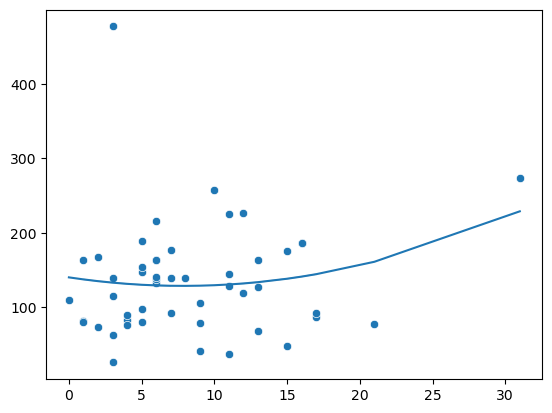

In [35]:
import seaborn as sb


sb.scatterplot(x=x.flatten(),y=Y.flatten())
sb.lineplot(x=x.flatten(),y=Y_pred.flatten())

Provide model output and an interpretation of the results. 

There can be so many diffrent scenarios when we are looking at the model output. We can try to predict numnber of bikes based on the number of parks nearby. May be in some cases there is no corelation between those two. May ne people are bringing cars close to park then renting bikes. Even how many bikes are available to use also depends on day & time of the day as well. 

In [ ]:
import statsmodels.api as sm

r = sm.add_constant(r) # adding a constant
lin_reg = sm.OLS(s,r['longitude'])

model = lin_reg.fit()
print_model = model.summary()
print(print_model)

# Stretch

How can you turn the regression model into a classification model?